In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras


In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
path = "./data/train/wasp"
name ='278591_13f688b836_m.jpg'

In [ ]:
fullname = f'{path}/{name}'
fullname

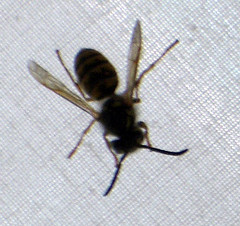

In [31]:
load_img(fullname)

In [32]:
img = load_img(fullname, target_size = (299,299))

In [33]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x26A2BBEE800>


In [34]:
x = np.array(img)
x.shape

(299, 299, 3)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))

In [38]:
model .add(MaxPooling2D(pool_size=(2,2)))

In [39]:
model.add(Flatten())

In [40]:
model.add(Dense(64, activation='relu'))

In [41]:
model.add(Dense(1, activation='sigmoid'))

In [42]:
sgd =SGD(learning_rate=0.002, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
X = np.array([x])

In [44]:
X.shape

(1, 299, 299, 3)

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
# Define the image generator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
# set up the train and test generators
train_generator = train_datagen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)
test_generator = test_datagen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [48]:
# Train the model
history =model.fit(
    train_generator,
    epochs = 10,
    validation_data=test_generator
)

Epoch 1/10
184/184 [==============================] - 157s 837ms/step - loss: 0.6862 - accuracy: 0.5504 - val_loss: 0.6696 - val_accuracy: 0.5414
Epoch 2/10
184/184 [==============================] - 136s 737ms/step - loss: 0.6216 - accuracy: 0.6519 - val_loss: 0.5918 - val_accuracy: 0.6841
Epoch 3/10
184/184 [==============================] - 145s 789ms/step - loss: 0.5674 - accuracy: 0.7131 - val_loss: 0.5597 - val_accuracy: 0.7266
Epoch 4/10
184/184 [==============================] - 133s 724ms/step - loss: 0.5289 - accuracy: 0.7378 - val_loss: 0.5227 - val_accuracy: 0.7560
Epoch 5/10
184/184 [==============================] - 132s 716ms/step - loss: 0.4973 - accuracy: 0.7656 - val_loss: 0.5336 - val_accuracy: 0.7495
Epoch 6/10
184/184 [==============================] - 135s 735ms/step - loss: 0.4851 - accuracy: 0.7726 - val_loss: 0.5337 - val_accuracy: 0.7331
Epoch 7/10
184/184 [==============================] - 131s 712ms/step - loss: 0.4514 - accuracy: 0.7996 - val_loss: 0.5650 -

In [50]:
# Median accuracy
training_accuracies = [0.5504, 0.6519, 0.7131, 0.7378, 0.7656, 0.7726, 0.7996, 0.8134, 0.8322,  0.8523]
median_training_accuracy = np.median(training_accuracies)
print("Median Training Accuracy:", median_training_accuracy)

Median Training Accuracy: 0.7690999999999999


In [53]:
training_accuracies = history.history['accuracy']
median_training_accuracy = np.median(training_accuracies)
print("Median Training Accuracy:", median_training_accuracy)

Median Training Accuracy: 0.7691052556037903


In [51]:
# Stanndard deviatio for training loss
loss_values= history.history['loss']
std_dev = np.std(loss_values)
print("Training Loss Standard Deviation:", std_dev )

Training Loss Standard Deviation: 0.0967567266065652


In [52]:
# Stanndard deviatio for training loss
loss_values= [0.6862, 0.6216, 0.5674, 0.5289, 0.4973, 0.4851, 0.4514, 0.4188, 0.3950, 0.3637]
std_dev = np.std(loss_values)
print("Training Loss Standard Deviation:", std_dev )

Training Loss Standard Deviation: 0.09674639218079402


In [59]:
# Define the data generator with augmentations
train_datagen_augumented = ImageDataGenerator(
    rescale =1./225,
    rotation_range=50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [60]:
train_dds = './data/train'

In [62]:
#set up augmented generator
train_generator_augmented = train_datagen_augumented.flow_from_directory(
    train_dds,
    target_size = (150, 150),
    batch_size =20,
    class_mode = 'binary',
    shuffle=True
)

Found 3677 images belonging to 2 classes.


In [63]:
# Train the model with augmented data
history_augmented = model.fit(
    train_generator_augmented,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
184/184 [==============================] - 177s 960ms/step - loss: 0.5014 - accuracy: 0.7634 - val_loss: 0.5057 - val_accuracy: 0.7538
Epoch 2/10
184/184 [==============================] - 151s 819ms/step - loss: 0.4852 - accuracy: 0.7710 - val_loss: 0.5043 - val_accuracy: 0.7712
Epoch 3/10
184/184 [==============================] - 151s 821ms/step - loss: 0.4815 - accuracy: 0.7748 - val_loss: 0.4974 - val_accuracy: 0.7647
Epoch 4/10
184/184 [==============================] - 151s 818ms/step - loss: 0.4714 - accuracy: 0.7871 - val_loss: 0.4964 - val_accuracy: 0.7549
Epoch 5/10
184/184 [==============================] - 150s 811ms/step - loss: 0.4762 - accuracy: 0.7781 - val_loss: 0.6128 - val_accuracy: 0.7190
Epoch 6/10
184/184 [==============================] - 152s 823ms/step - loss: 0.4753 - accuracy: 0.7827 - val_loss: 0.4562 - val_accuracy: 0.7930
Epoch 7/10
184/184 [==============================] - 151s 822ms/step - loss: 0.4687 - accuracy: 0.7822 - val_loss: 0.4642 -

In [65]:
test_loss_values = history_augmented.history['val_loss']
mean_test_loss = np.mean(test_loss_values)
print("Mean of test loss for all epochs:", mean_test_loss)

Mean of test loss for all epochs: 0.49043544828891755


In [66]:
test_accuracy_values_last_5_epochs = history_augmented.history['val_accuracy'][5:]
average_test_accuracy_last_5_epochs = np.mean(test_accuracy_values_last_5_epochs)
print("Average of test accuracy for last 5 epochs:", average_test_accuracy_last_5_epochs)

Average of test accuracy for last 5 epochs: 0.7969498872756958
